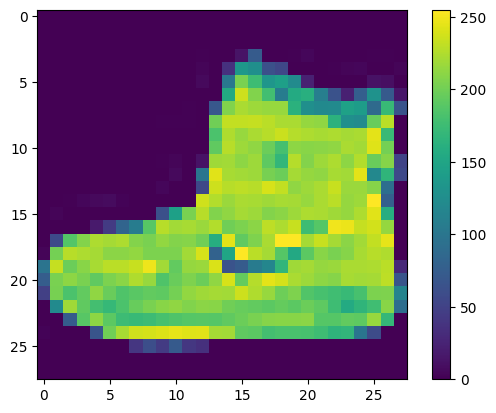

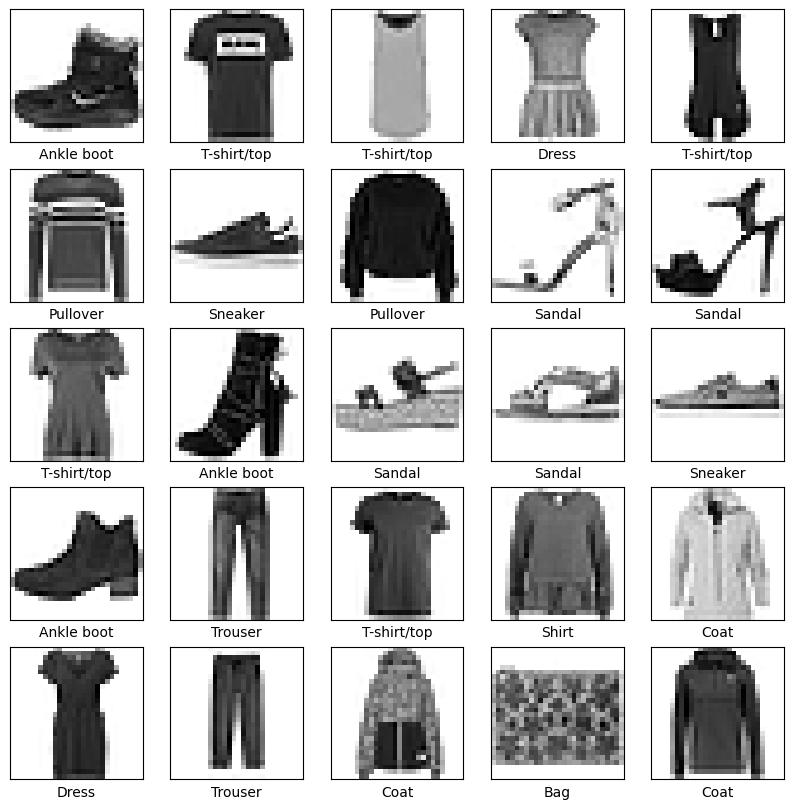

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.9134 - loss: 0.2293
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.9168 - loss: 0.2214
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.9201 - loss: 0.2154
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.9197 - loss: 0.2139
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.9242 - loss: 0.2016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.9256 - loss: 0.1957
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - accuracy: 0.9267 - loss: 0.1911
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9312 - loss: 0.1824
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.9309 - loss: 0.1828
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9342 - loss: 0.1746
313/313 - 0s - 511us/step - accuracy: 0.8878 - loss: 0.3488

Test accuracy: 0.8877999782562256


In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


array([4.2880583e-07, 2.3886071e-10, 1.5695091e-08, 4.9167430e-09,
       6.4117112e-09, 2.8498168e-04, 5.2815776e-06, 5.2145207e-03,
       8.7952010e-09, 9.9449474e-01], dtype=float32)

In [11]:
np.argmax(predictions[0])

9

In [12]:
np.argmax(predictions[0])

9

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

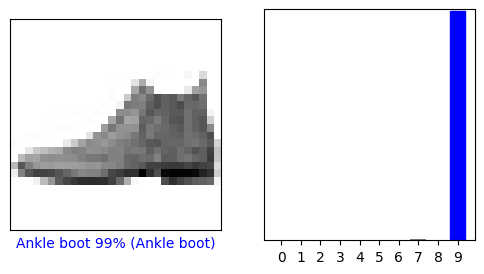

In [14]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

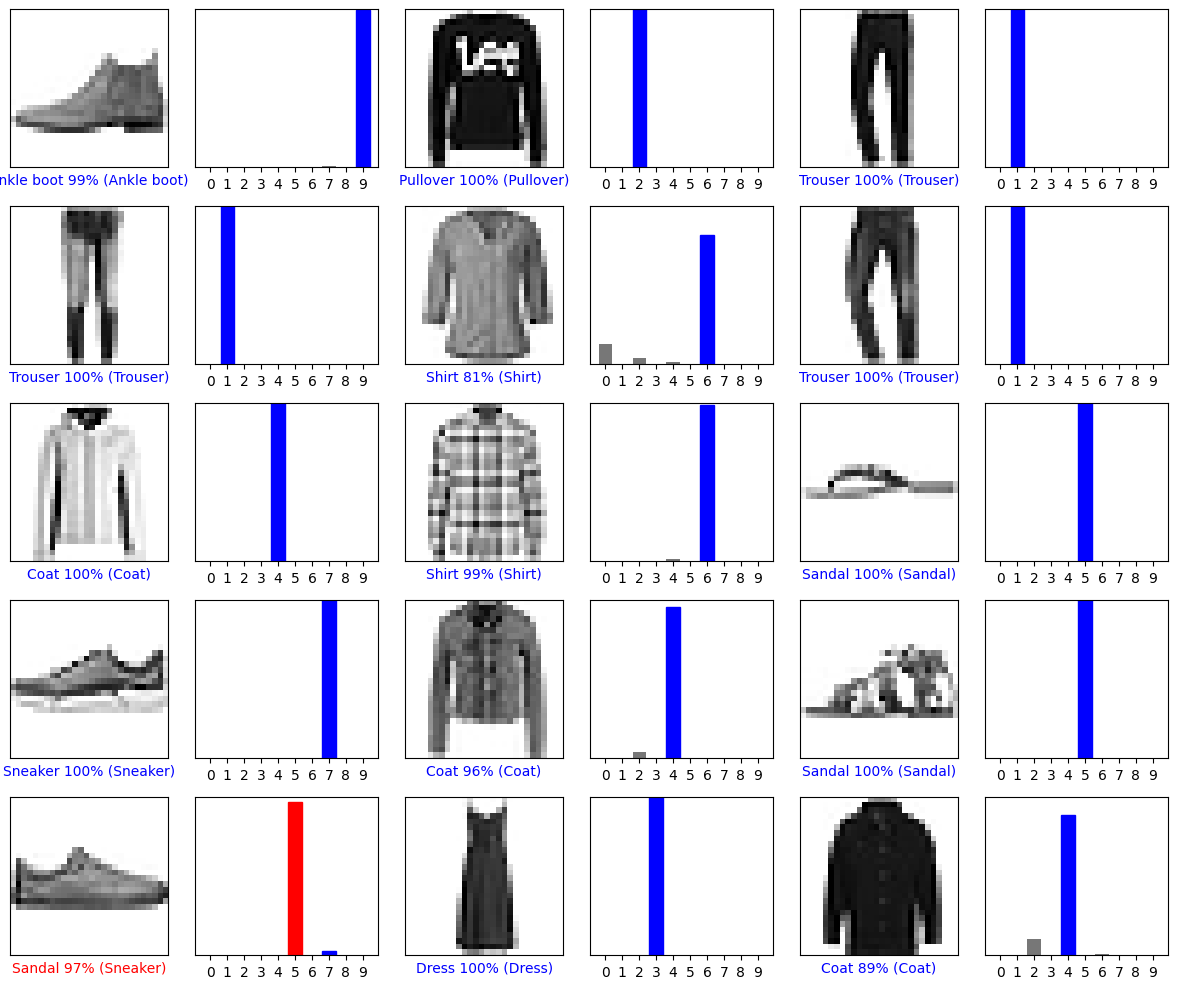

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()